import matplotlib.pyplot as plt
**Read File Name**

In [30]:
import os

folder_path = 'E:\_HTerm\Road Construction\پروژه\Traffic'
file_names = os.listdir(folder_path)
file_name_list = []

for file_name in file_names:
    if file_name[-4:] == '.rar':
        file_name_list.append(file_name)

**UnRar and Read DesiredFile**
Each file has the AAD value of the days of that month.

In [31]:
from unrar import rarfile
from unrar.rarfile import BadRarFile
import os

desired_file_name_1 = '21 ‫استان اصفهان‬\‫حجم تردد روزانه‬\Daily 213101'
desired_file_name_2 = '21 ‫استان اصفهان‬\‫حجم تردد روزانه‬\Daily 213151'
folder_path = 'E:\\_HTerm\\Road Construction\\پروژه\\Traffic'
desired_path_1 = []
desired_path_2 = []

for file_name in file_name_list:
    if file_name.endswith('.rar'):
        rar_path = os.path.join(folder_path, file_name)
        out_path = os.path.join(folder_path, 'file', file_name)
        try:
            rar = rarfile.RarFile(rar_path)
            for file_entry in rar.infolist():
                if desired_file_name_1 in file_entry.filename:
                    rar.extract(file_entry, out_path)
                    desired_path_1.append(os.path.join(out_path, file_entry.filename))
                if desired_file_name_2 in file_entry.filename:
                    rar.extract(file_entry, out_path)
                    desired_path_2.append(os.path.join(out_path, file_entry.filename))
        except BadRarFile as badrar:
            print("No rar file found!", badrar)

No rar file found! Bad RAR archive data: File create error


**Create DataFrame and Date Columns**

In [32]:
import numpy as np
import pandas as pd

df1 = pd.DataFrame(np.nan , index=range(120), columns=['Date', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5'])
df2 = pd.DataFrame(np.nan , index=range(120), columns=['Date', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5'])

Date = []

for year in range(92, 102):
    for month in range(1, 13):
        if year < 100:
            Date.append(f"{year:02d}_{month:02d}")
        else:
            Date.append(f"{year-100:02d}_{month:02d}")

df1['Date'] = Date
df2['Date'] = Date

**Read Excel Data**

In [33]:
for path in desired_path_1:
    excel_data = pd.read_excel(path, header=None).drop([0, 1])
    df1.loc[df1['Date'] == path[47:52], 'Class1'] = np.mean(excel_data[:][4])
    df1.loc[df1['Date'] == path[47:52], 'Class2'] = np.mean(excel_data[:][5])
    df1.loc[df1['Date'] == path[47:52], 'Class3'] = np.mean(excel_data[:][6])
    df1.loc[df1['Date'] == path[47:52], 'Class4'] = np.mean(excel_data[:][7])
    df1.loc[df1['Date'] == path[47:52], 'Class5'] = np.mean(excel_data[:][8])

for path in desired_path_2:
    excel_data = pd.read_excel(path, header=None).drop([0, 1])
    df2.loc[df2['Date'] == path[47:52], 'Class1'] = np.mean(excel_data[:][4])
    df2.loc[df2['Date'] == path[47:52], 'Class2'] = np.mean(excel_data[:][5])
    df2.loc[df2['Date'] == path[47:52], 'Class3'] = np.mean(excel_data[:][6])
    df2.loc[df2['Date'] == path[47:52], 'Class4'] = np.mean(excel_data[:][7])
    df2.loc[df2['Date'] == path[47:52], 'Class5'] = np.mean(excel_data[:][8])

**Interpolation of NaN Values**

In [35]:
df1.interpolate(method='pad', inplace=True, limit_direction='forward')

df2.interpolate(method='pad', inplace=True, limit_direction='forward')

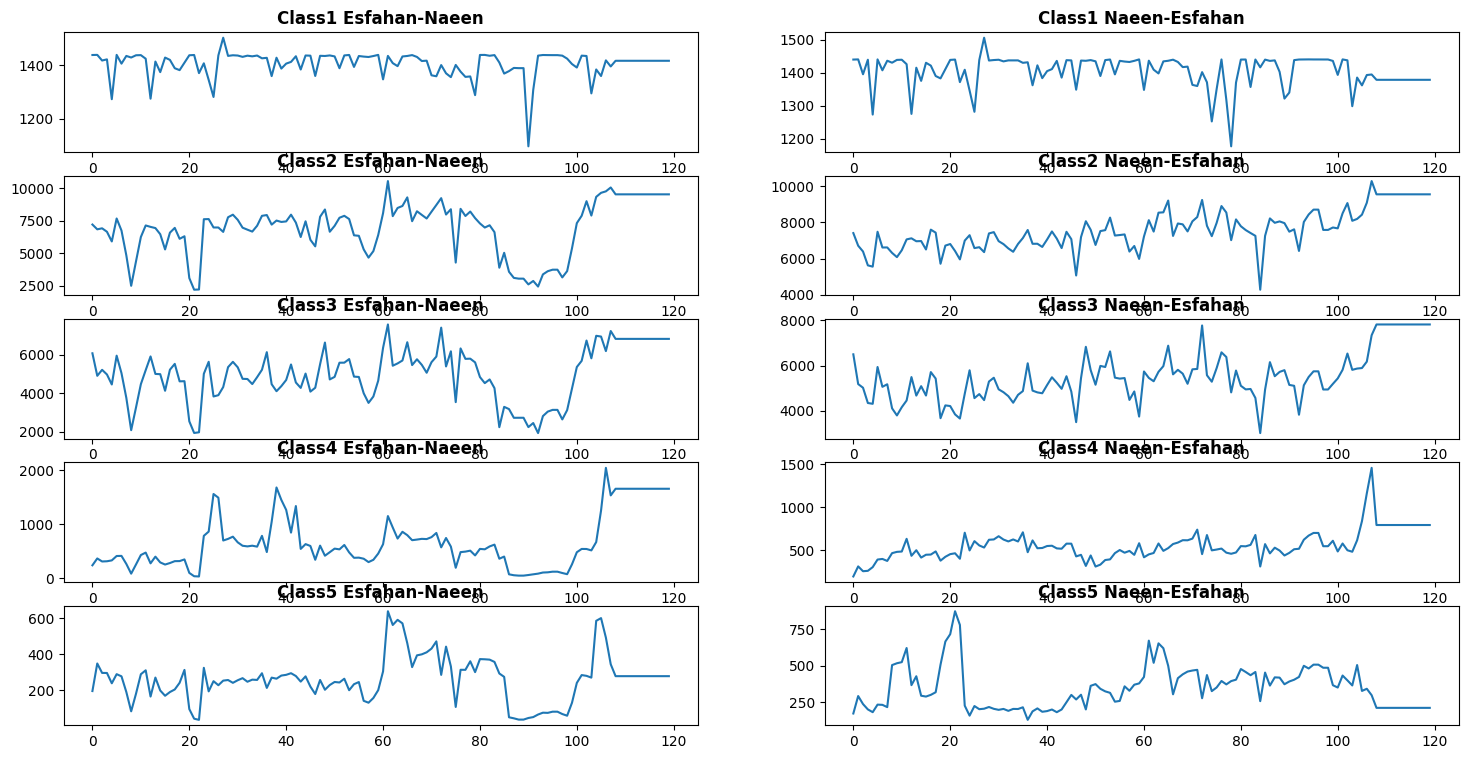

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.subplot(5,2,1)
plt.plot(df1['Class1'])
plt.title('Class1 Esfahan-Naeen', fontweight ="bold")
plt.subplot(5,2,2)
plt.plot(df2['Class1'])
plt.title('Class1 Naeen-Esfahan', fontweight ="bold")

plt.subplot(5,2,3)
plt.plot(df1['Class2'])
plt.title('Class2 Esfahan-Naeen', fontweight ="bold")
plt.subplot(5,2,4)
plt.plot(df2['Class2'])
plt.title('Class2 Naeen-Esfahan', fontweight ="bold")

plt.subplot(5,2,5)
plt.plot(df1['Class3'])
plt.title('Class3 Esfahan-Naeen', fontweight ="bold")
plt.subplot(5,2,6)
plt.plot(df2['Class3'])
plt.title('Class3 Naeen-Esfahan', fontweight ="bold")

plt.subplot(5,2,7)
plt.plot(df1['Class4'])
plt.title('Class4 Esfahan-Naeen', fontweight ="bold")
plt.subplot(5,2,8)
plt.plot(df2['Class4'])
plt.title('Class4 Naeen-Esfahan', fontweight ="bold")

plt.subplot(5,2,9)
plt.plot(df1['Class5'])
plt.title('Class5 Esfahan-Naeen', fontweight ="bold")
plt.subplot(5,2,10)
plt.plot(df2['Class5'])
plt.title('Class5 Naeen-Esfahan', fontweight ="bold")
plt.show()